In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)


Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.pipeline import Pipeline as imbPipeline

In [ ]:
# Load the diabetes dataset
diabetes_df = pd.read_csv('/content/drive/MyDrive/Data Science - Classification -Diabates Dataset/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

In [ ]:
# Explore the data
diabetes_df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [ ]:
diabetes_df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

**Identify features and labels**

In [ ]:
# Identify features and labels
X = diabetes_df.drop('Income', axis=1)
y = diabetes_df['Income']

** Check for missing values**

In [ ]:
# Check for missing values
print(X.isnull().sum())

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
dtype: int64


**Check and remove the duplicates**

In [ ]:
# Check for duplicates
duplicates = diabetes_df.duplicated()
print(duplicates.sum())

1635


In [ ]:
diabetes_df.drop_duplicates(inplace=True)

In [ ]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69057 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       69057 non-null  float64
 1   HighBP                69057 non-null  float64
 2   HighChol              69057 non-null  float64
 3   CholCheck             69057 non-null  float64
 4   BMI                   69057 non-null  float64
 5   Smoker                69057 non-null  float64
 6   Stroke                69057 non-null  float64
 7   HeartDiseaseorAttack  69057 non-null  float64
 8   PhysActivity          69057 non-null  float64
 9   Fruits                69057 non-null  float64
 10  Veggies               69057 non-null  float64
 11  HvyAlcoholConsump     69057 non-null  float64
 12  AnyHealthcare         69057 non-null  float64
 13  NoDocbcCost           69057 non-null  float64
 14  GenHlth               69057 non-null  float64
 15  MentHlth           

**Visualization**

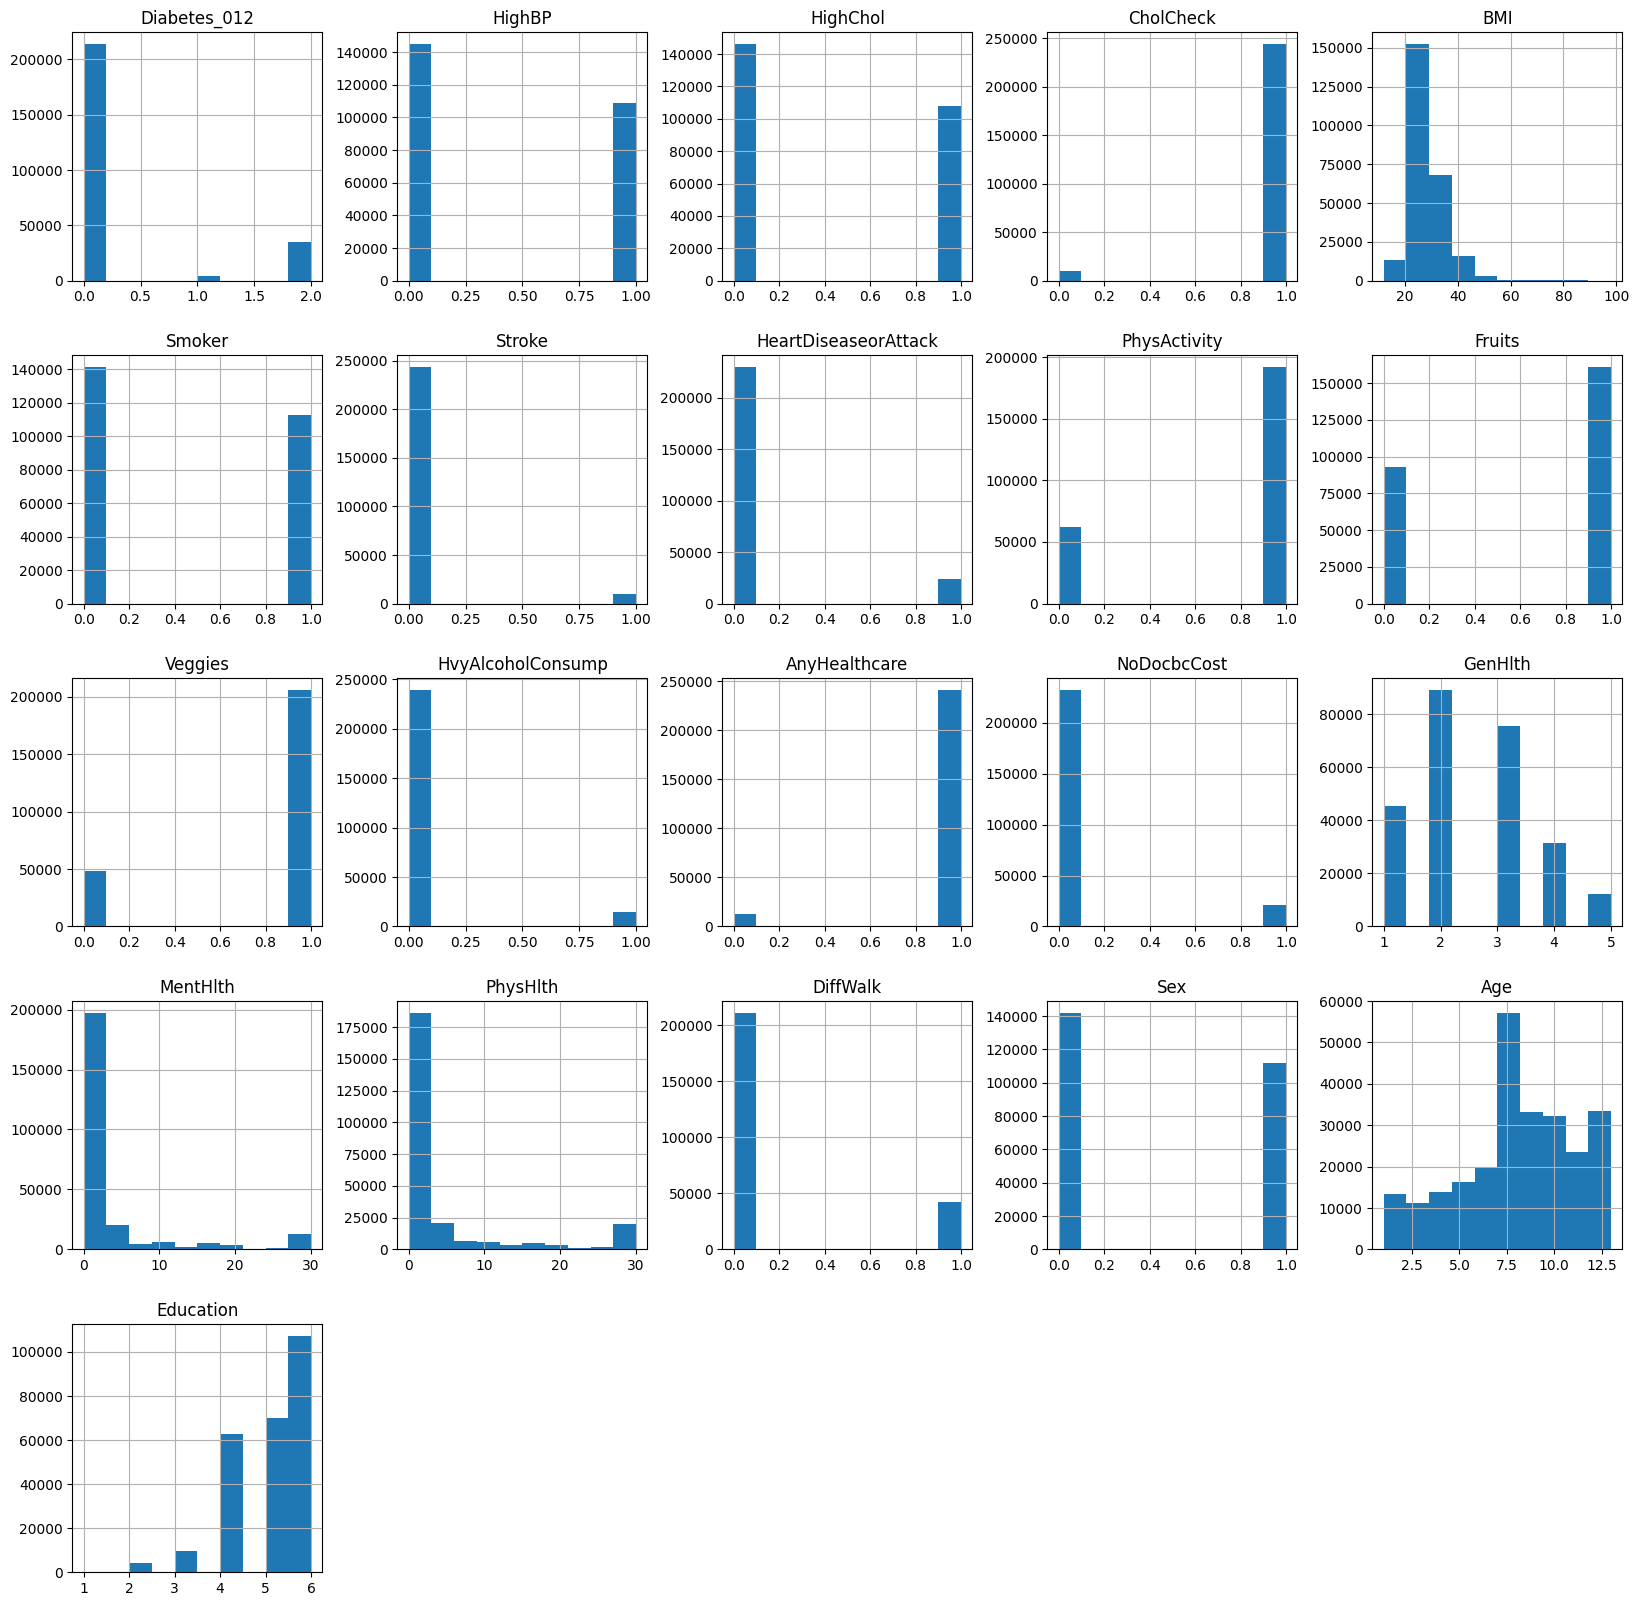

In [ ]:
# Visualize the features using histograms for each column
X.hist(figsize=(20,20))
plt.show()

**Correlation Matrix**

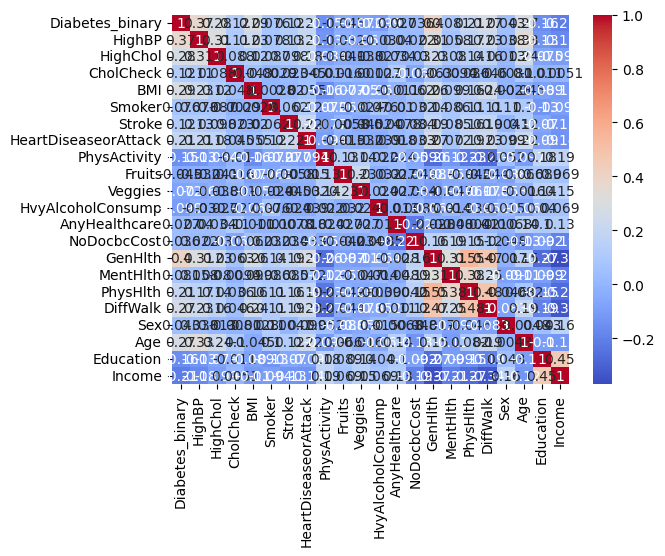

In [ ]:
# Create a correlation matrix
corr_matrix = diabetes_df.corr()

# Visualize the correlation matrix using a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
# Analyze relationships between features using a correlation matrix
corr_matrix = diabetes_df.corr()
top_features = corr_matrix['Income'].sort_values(ascending=False).index[:7]
selected_df = diabetes_df[top_features]

** Rank the features using PCA and Random forest**

In [ ]:
# Rank the features using PCA and Random forest
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA()
pca.fit(X_scaled)
print(pca.explained_variance_ratio_)
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)
print(rf.feature_importances_)

[0.16227703 0.08313316 0.06488174 0.05658451 0.0535986  0.05010714
 0.04896666 0.04514624 0.04368071 0.04195772 0.03836316 0.03709964
 0.0358146  0.03484877 0.03457691 0.03388396 0.0331725  0.03164786
 0.02632681 0.02383738 0.02009489]
[0.0260995  0.02669922 0.03706919 0.01053669 0.25778481 0.03357064
 0.0110682  0.01727916 0.02330243 0.03933368 0.01875309 0.01299891
 0.00919581 0.0114031  0.05093217 0.08407079 0.09397507 0.01434627
 0.01850066 0.13304219 0.07003842]


In [ ]:
# Use certain features not all the features
X = X[['Glucose', 'BMI', 'Age', 'BloodPressure']]

In [ ]:
# Calculate Central/Dispersion measures
print(y.describe())

count    253680.000000
mean          6.053875
std           2.071148
min           1.000000
25%           5.000000
50%           7.000000
75%           8.000000
max           8.000000
Name: Income, dtype: float64


In [ ]:
# Check the proportion of the target values
print(y.value_counts(normalize=True))

8.0    0.356295
7.0    0.170368
6.0    0.143764
5.0    0.102030
4.0    0.079372
3.0    0.063048
2.0    0.046448
1.0    0.038675
Name: Income, dtype: float64


In [ ]:
# Rebalance the dataset using resembling techniques
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)
print(y_resampled.value_counts(normalize=True))

3.0    0.125
1.0    0.125
8.0    0.125
6.0    0.125
4.0    0.125
7.0    0.125
2.0    0.125
5.0    0.125
Name: Income, dtype: float64


In [ ]:
# Split the data into train and test (80-20)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

**RandomForest-GridSearch**

In [ ]:
# Use different base models
#23 min & 6 sec
parameters = {'criterion': ['gini', 'entropy'], 'max_depth': [3, 5, 7, 9]}
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, parameters, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
y_pred = grid_search.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion matrix:', confusion_matrix(y_test, y_pred))

{'criterion': 'gini', 'max_depth': 9}
Accuracy: 0.29433119433534327
Confusion matrix: [[10599  1949   656   881   667   564  1442  1210]
 [ 5456  5686   790  1569  1298   813  1408  1129]
 [ 5047  2944  2279  1820  1757   998  1922  1406]
 [ 3787  2593   949  2912  2107  1311  2339  2013]
 [ 2847  1972   864  1874  3046  1546  3035  2950]
 [ 2084  1346   565  1383  2237  2054  3860  4562]
 [ 1448   803   295   791  1543  1540  4551  7084]
 [  773   336   106   261   716   833  3572 11438]]


**Random Forest-ensembeling**

In [ ]:
# Use ensembling techniques to see if there is any improvement in the overall accuracy
param_dist = {'criterion': ['gini', 'entropy'], 'max_depth': [3, 5, 7, 9]}
rf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)
pipeline = imbPipeline(steps=[('oversampling', SMOTE(random_state=42)), ('random_search', random_search)])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion matrix:', confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Accuracy: 0.29500885102616586
Confusion matrix: [[10428  1992   695   911   691   719  1299  1233]
 [ 5348  5726   931  1474  1338   920  1232  1180]
 [ 4941  2882  2460  1725  1860  1133  1691  1481]
 [ 3698  2623  1096  2736  2270  1458  2072  2058]
 [ 2681  2039   952  1727  3291  1741  2710  2993]
 [ 2016  1366   641  1290  2352  2311  3488  4627]
 [ 1384   809   332   762  1655  1808  4037  7268]
 [  747   349   118   266   769   994  3118 11674]]


In [ ]:
# Plot the test set using only two principal components
X_scaled = scaler.fit_transform(X_resampled)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_resampled)
plt.show()



In [ ]:
# Use the concept of pipeline for your machine learning modeling
pipeline = imbPipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2)), ('classifier', RandomForestClassifier(random_state=42))])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion matrix:', confusion_matrix(y_test, y_pred))